---
## Exploratory Data Analysis
Código de Noe 👻👻

---


In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la visualización de gráficos
%matplotlib inline
sns.set(style="whitegrid")

---
## Importamos el dataset

---

In [ ]:
# Cargar el dataset Titanic desde seaborn
df = sns.load_dataset('titanic')

# Mostrar las primeras filas
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.to_csv("prueba_caece.csv", sep=";")

In [ ]:
df2 = pd.read_csv("prueba_caece.csv", index_col=0, sep=";")
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
## Hacemos un análisis inicial

#### Utilizando las herramientas de pandas

---

In [ ]:
# Resumen de las variables y los tipos de datos
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.survived.unique()

array([0, 1])

In [ ]:
# Resumen estadístico de las variables numéricas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
n_row, n_col = df.shape
n_row, n_col

(891, 15)

In [ ]:
# Contar los valores nulos por columna
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


---

## Limpieza de datos

---

#### Cual creen que es la mejor opcion a la hora de eliminar?

- Opcion 1) Hacer un drop de todas las filas con nulos
- Opcion 2) Eliminar primero columnas con muchos NaN y luego dropear las filas que quedan

---

📌 Opcion 1 -
Con esta estrategia veremos que quedan muy pocas filas en el dataset

---

In [ ]:
# Opcional: Eliminar filas con valores nulos (o utilizar imputación)
df_clean_1 = df.dropna()
df_clean_1.shape

(182, 15)

---
📌 Opción 2

---

In [ ]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
df_subclean = df.drop(columns=["deck"])
df_subclean.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df_subclean.shape

(891, 14)

In [ ]:
df_clean = df_subclean.dropna()
df_clean.shape

(712, 14)

In [ ]:
891-712

179

---

## Análisis Univariado

---

#### Variables numéricas

---

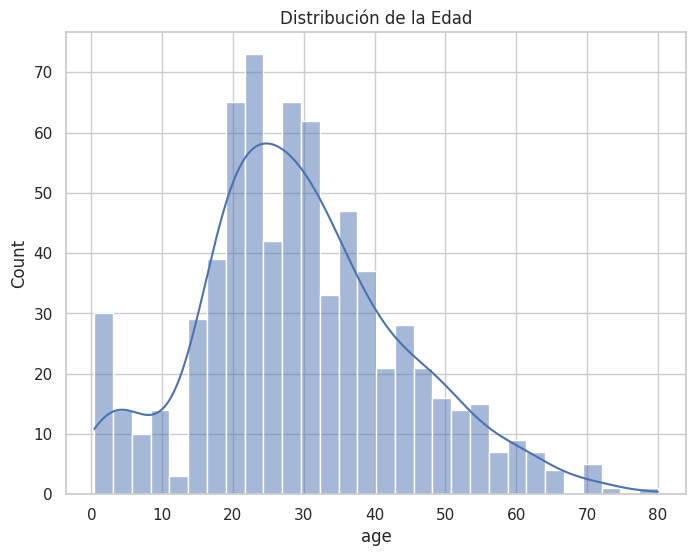

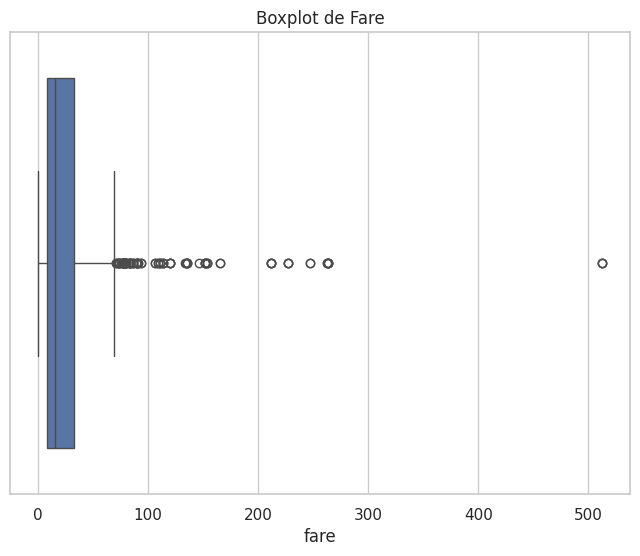

In [ ]:
# Histograma para la variable 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Boxplot para la variable 'fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['fare'])
plt.title('Boxplot de Fare')
plt.show()

---
#### Variables categoricas

---

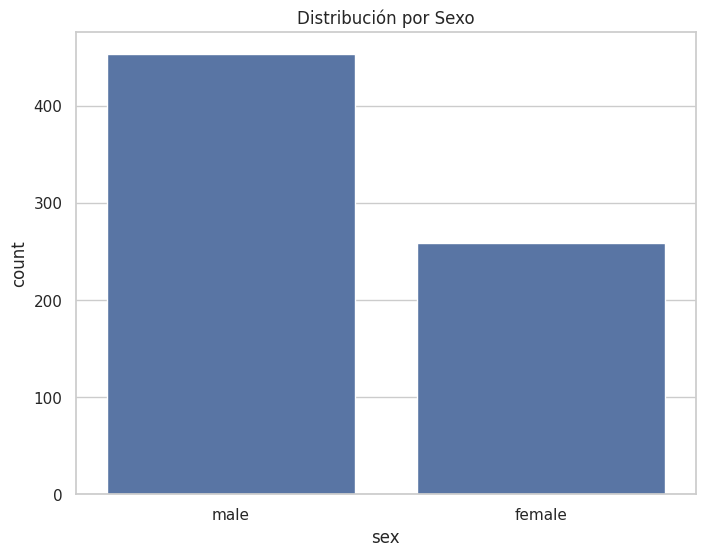

<ipython-input-25-90816773fbe3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_clean, palette='muted')


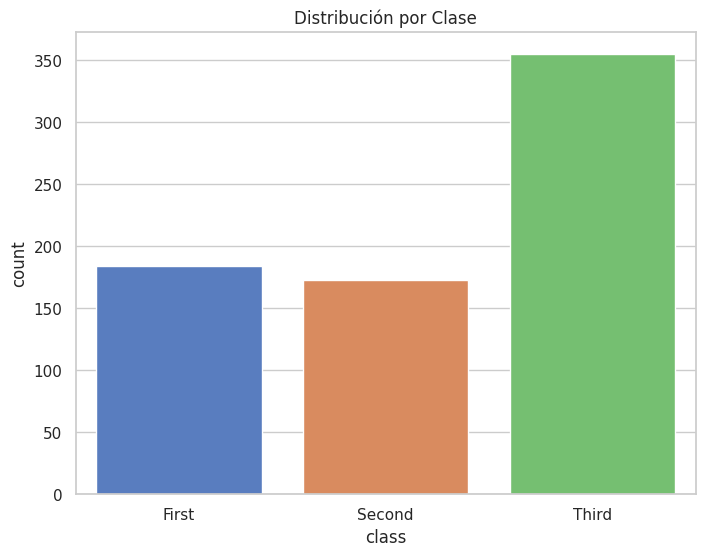

In [ ]:
# Contar la frecuencia de la variable 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df_clean)
plt.title('Distribución por Sexo')
plt.show()

# Distribución de la variable 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df_clean, palette='muted')
plt.title('Distribución por Clase')
plt.show()

---
## Análisis Bivariado


---

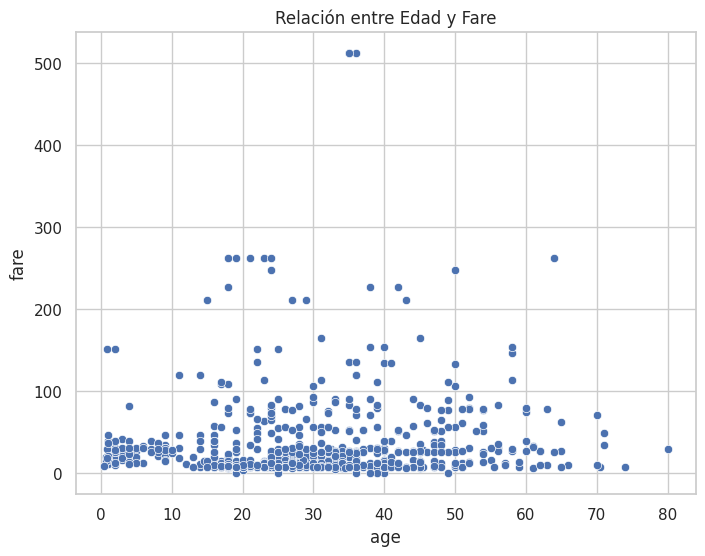

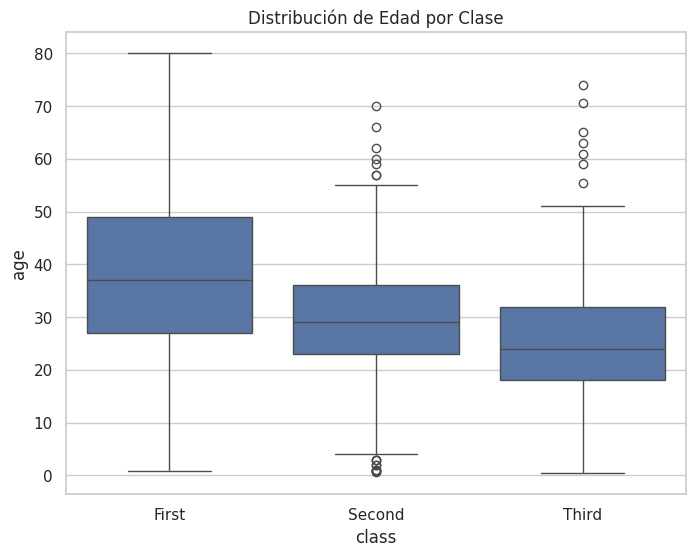

In [ ]:
# Gráfico de dispersión entre 'age' y 'fare'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=df_clean)
plt.title('Relación entre Edad y Fare')
plt.show()

# Gráfico de cajas para ver la relación entre 'class' y 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='age', data=df_clean)
plt.title('Distribución de Edad por Clase')
plt.show()

---
#### Relación entre variable categórica y el objetivo (survived)

---

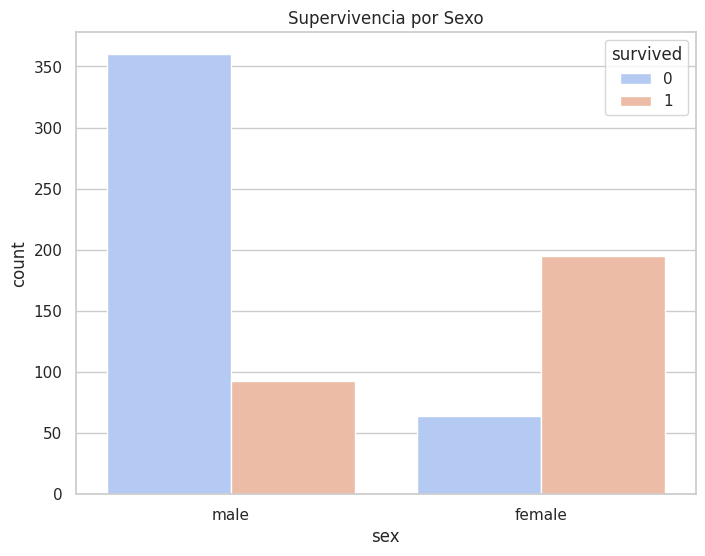

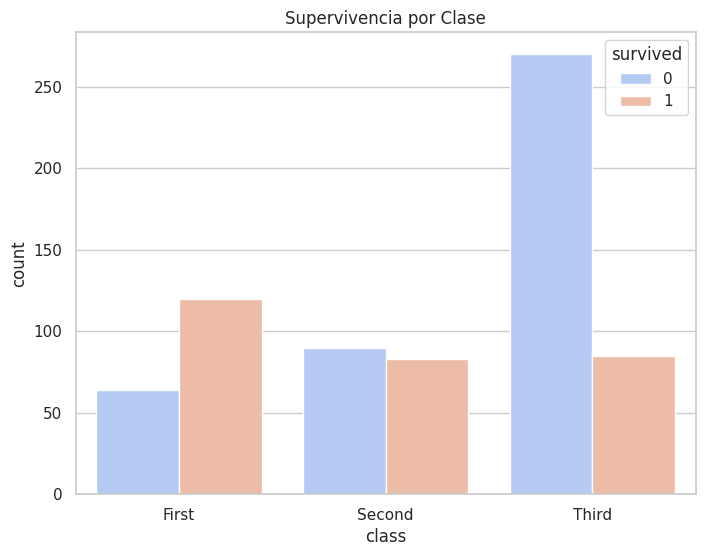

In [ ]:
# Gráfico de barras para la variable 'sex' vs 'survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df_clean, palette='coolwarm')
plt.title('Supervivencia por Sexo')
plt.show()

# Gráfico de barras para 'class' vs 'survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='survived', data=df_clean, palette='coolwarm')
plt.title('Supervivencia por Clase')
plt.show()

---
### Análisis Multivariado

---

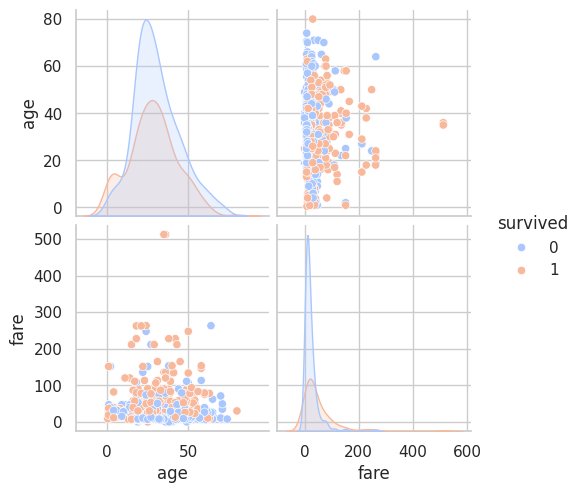

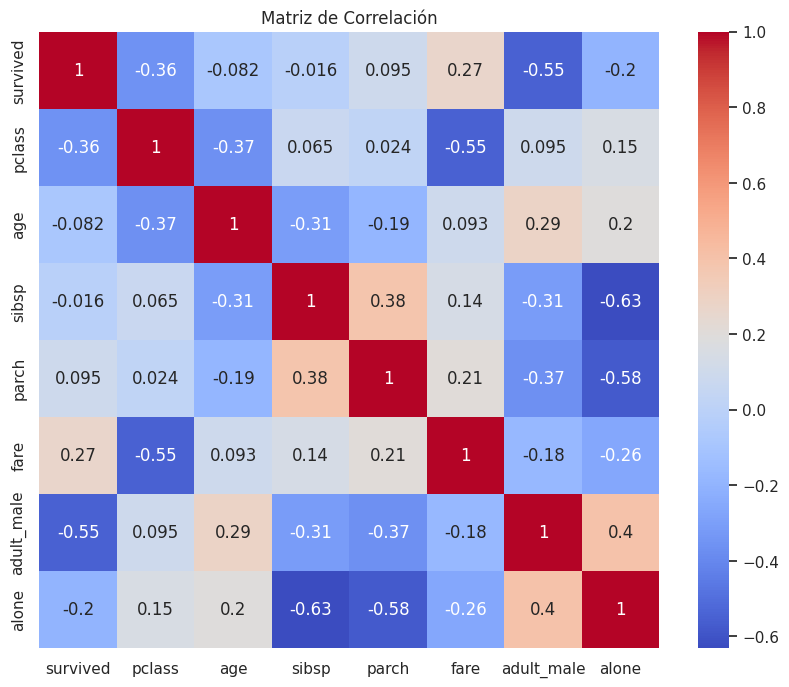

In [ ]:
# Pairplot de las variables numéricas más importantes
sns.pairplot(df_clean[['age', 'fare', 'survived']], hue='survived', palette='coolwarm')
plt.show()

# Heatmap para mostrar la correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df_clean['sex_binary'] = df_clean['sex'].map({'male': 0, 'female': 1})

<ipython-input-31-9280c02c3c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sex_binary'] = df_clean['sex'].map({'male': 0, 'female': 1})


In [ ]:
df_clean["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
df_clean['class_coded'] = df_clean['class'].map({'First': 1, 'Second': 2, 'Third':3})

<ipython-input-35-718a447de423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['class_coded'] = df_clean['class'].map({'First': 1, 'Second': 2, 'Third':3})


In [ ]:
df_clean['class_coded']=df_clean['class_coded'].astype('int64')

<ipython-input-45-9da6bf35e339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['class_coded']=df_clean['class_coded'].astype('int64')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
 14  sex_binary   712 non-null    int64   
 15  class_coded  712 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(6), object(5)
memory usage: 80.1+ KB


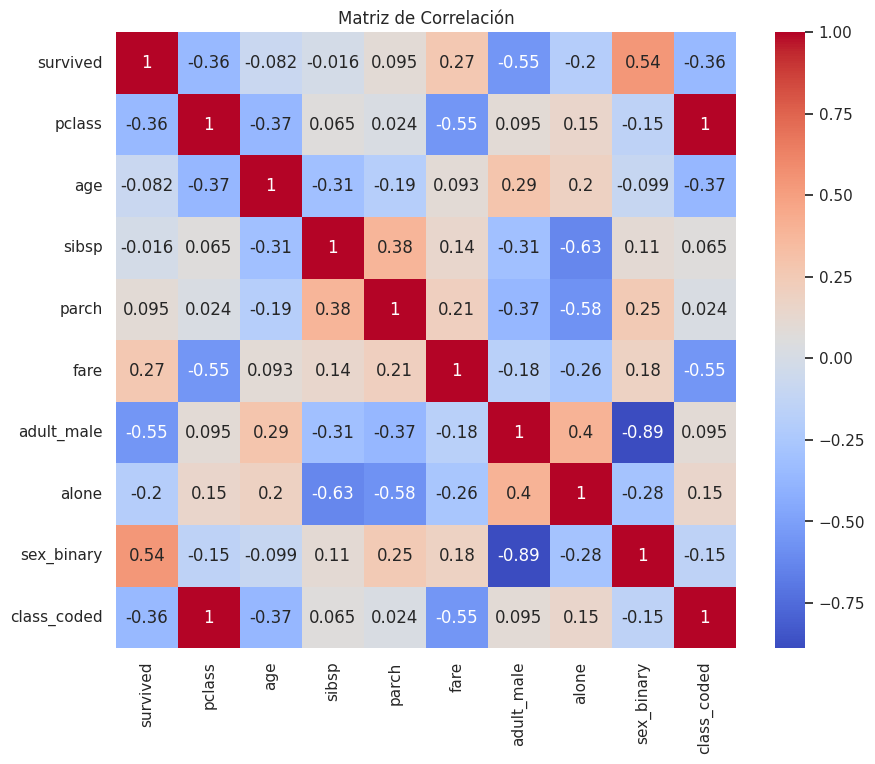

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

---
### Detección de outliers

---


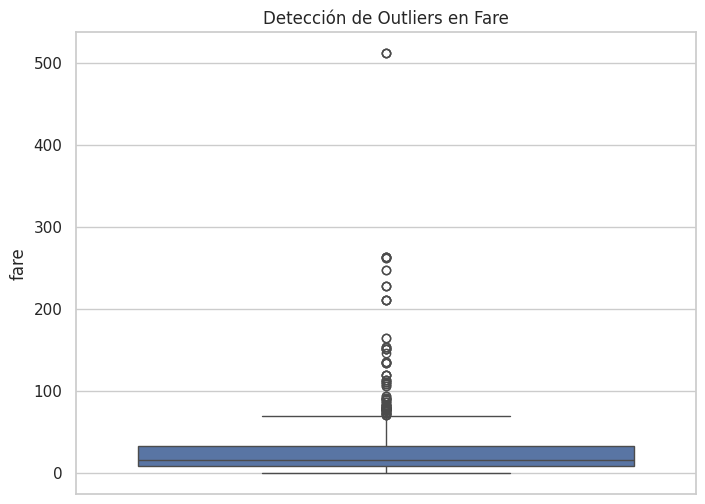

In [ ]:
# Detección de outliers en 'fare'
plt.figure(figsize=(8, 6))
sns.boxplot(y='fare', data=df_clean)
plt.title('Detección de Outliers en Fare')
plt.show()



In [ ]:

# Opcional: Eliminar o tratar outliers
q1 = df_clean['fare'].quantile(0.25)
q3 = df_clean['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Eliminar outliers en 'fare'
mask_x = (df_clean['fare'] >= lower_bound) & (df_clean['fare'] <= upper_bound)
df_no_outliers = df_clean.loc[mask_x]

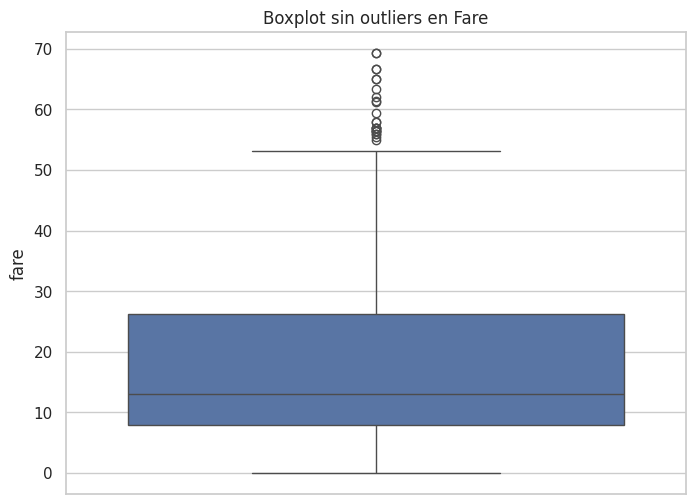

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='fare', data=df_no_outliers)
plt.title('Boxplot sin outliers en Fare')
plt.show()

In [ ]:
df_no_outliers.describe()

,survived,pclass,age,sibsp,parch,fare,sex_binary,class_coded
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.356564,2.423015,28.919368,0.487844,0.398703,19.026803,0.329011,2.423015
std,0.479373,0.741393,14.326895,0.953598,0.846995,14.282146,0.470235,0.741393
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000,0.000000,2.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,3.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,26.283300,1.000000,3.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,69.300000,1.000000,3.000000


## 📌 Todo: Aplicar un escalador